In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
# Load the dataset
df = pd.read_csv('data_science_job.csv')

In [62]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,5,0.920,1,0,2,0,5,20.0,8,6,36.0,1.0
1,29725,77,0.776,1,1,2,0,5,15.0,4,5,47.0,0.0
2,11561,64,0.624,3,1,0,0,5,5.0,8,6,83.0,0.0
3,33241,14,0.789,3,1,3,0,1,0.0,8,5,52.0,1.0
4,666,50,0.767,1,0,2,2,5,20.0,4,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,14.0,8,6,42.0,1.0
19154,31398,5,0.920,1,0,2,0,5,14.0,8,6,52.0,1.0
19155,24576,5,0.920,1,0,2,0,5,20.0,4,5,44.0,0.0
19156,5756,94,0.802,1,0,2,1,6,0.0,5,5,97.0,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  18679 non-null  float64
 3   gender                  19158 non-null  int64  
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  int64  
 6   education_level         19158 non-null  int64  
 7   major_discipline        19158 non-null  int64  
 8   experience              19093 non-null  float64
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 1.9 MB


In [64]:
df.isnull().mean() * 100

enrollee_id               0.000000
city                      0.000000
city_development_index    2.500261
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.339284
company_size              0.000000
company_type              0.000000
training_hours            3.998330
target                    0.000000
dtype: float64

In [65]:
print('Original City development index variable variance: ', df['city_development_index'].var())
print('City development index Variance after -1 imputation: ', df['city_development_index'].fillna(-1).var())
print()
print('Original Experience variable variance: ', df['experience'].var())
print('Experience Variance after -1 imputation: ', df['experience'].fillna(-1).var())
print()
print('Original Training hours variable variance: ', df['training_hours'].var())
print('Training hours Variance after -1 imputation: ', df['training_hours'].fillna(-1).var())

Original City development index variable variance:  0.015211374664424446
City development index Variance after -1 imputation:  0.09637945318893501

Original Experience variable variance:  42.31851676548554
Experience Variance after -1 imputation:  42.57875524175738

Original Training hours variable variance:  3586.2881933989347
Training hours Variance after -1 imputation:  3611.0439874323233


In [66]:
df['city_development_index'] = df['city_development_index'].fillna(-1)
df['experience'] = df['experience'].fillna(-1)
df['training_hours'] = df['training_hours'].fillna(-1)

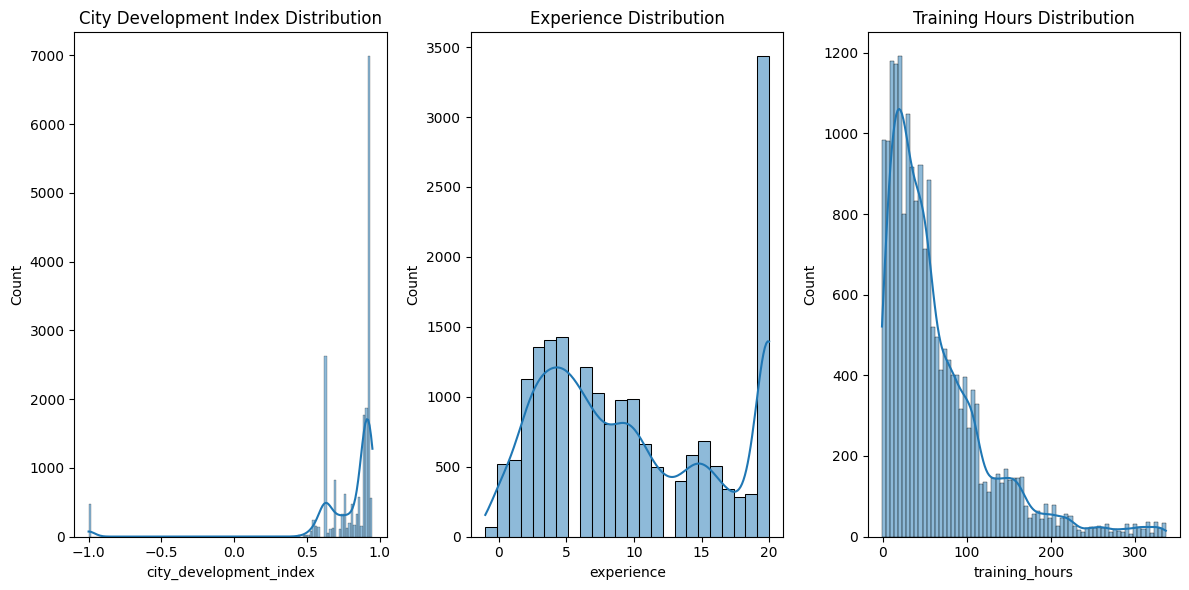

In [67]:
# Visualize Distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['city_development_index'], kde=True)
plt.title('City Development Index Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['experience'], kde=True)
plt.title('Experience Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['training_hours'], kde=True)
plt.title('Training Hours Distribution')

plt.tight_layout()
plt.show()

In [68]:
df.cov()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
enrollee_id,9.247308e+07,-3944.292094,-28.835686,-448.503958,187.235946,-228.871055,-271.166385,-180.565583,-2209.608590,573.211946,366.924801,594.035090,205.837604
city,-3.944292e+03,1257.695913,-1.427900,1.613128,0.098004,-1.987914,0.271745,3.929061,-26.942575,2.738530,1.030206,13.323062,0.862801
city_development_index,-2.883569e+01,-1.427900,0.096379,-0.017757,-0.003217,0.012813,0.005336,-0.011808,0.257208,-0.017017,-0.006897,-0.024231,-0.017754
gender,-4.485040e+02,1.613128,-0.017757,0.842835,0.040870,-0.061424,0.064581,0.063789,-0.873731,0.161618,0.060797,-0.024637,0.026880
relevent_experience,1.872359e+02,0.098004,-0.003217,0.040870,0.201651,-0.129663,0.059348,0.045339,-1.006206,0.442083,0.126181,-0.257073,0.024952
enrolled_university,-2.288711e+02,-1.987914,0.012813,-0.061424,-0.129663,0.678266,0.085081,-0.110943,1.702257,-0.441434,-0.101190,0.120298,-0.050370
education_level,-2.711664e+02,0.271745,0.005336,0.064581,0.059348,0.085081,1.412199,0.238214,0.276585,0.286073,0.065336,-0.500217,-0.038948
major_discipline,-1.805656e+02,3.929061,-0.011808,0.063789,0.045339,-0.110943,0.238214,1.112532,-0.640176,0.222974,0.093035,0.319015,-0.002516
experience,-2.209609e+03,-26.942575,0.257208,-0.873731,-1.006206,1.702257,0.276585,-0.640176,42.578755,-2.381541,-0.353698,0.182906,-0.503582
company_size,5.732119e+02,2.738530,-0.017017,0.161618,0.442083,-0.441434,0.286073,0.222974,-2.381541,8.201862,1.460287,-0.224077,0.230605


In [69]:
df.corr()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
enrollee_id,1.000000,-0.011566,-0.009659,-0.050803,0.043359,-0.028899,-0.023729,-0.017802,-0.035214,0.020814,0.025567,0.001028,0.049475
city,-0.011566,1.000000,-0.129693,0.049546,0.006154,-0.068063,0.006448,0.105038,-0.116427,0.026963,0.019465,0.006252,0.056233
city_development_index,-0.009659,-0.129693,1.000000,-0.062303,-0.023076,0.050115,0.014465,-0.036059,0.126968,-0.019140,-0.014887,-0.001299,-0.132183
gender,-0.050803,0.049546,-0.062303,1.000000,0.099137,-0.081239,0.059195,0.065875,-0.145851,0.061470,0.044373,-0.000447,0.067676
relevent_experience,0.043359,0.006154,-0.023076,0.099137,1.000000,-0.350603,0.111214,0.095723,-0.343392,0.343754,0.188282,-0.009527,0.128430
enrolled_university,-0.028899,-0.068063,0.050115,-0.081239,-0.350603,1.000000,0.086933,-0.127716,0.316759,-0.187159,-0.082329,0.002431,-0.141363
education_level,-0.023729,0.006448,0.014465,0.059195,0.111214,0.086933,1.000000,0.190048,0.035668,0.084057,0.036840,-0.007005,-0.075754
major_discipline,-0.017802,0.105038,-0.036059,0.065875,0.095723,-0.127716,0.190048,1.000000,-0.093014,0.073814,0.059102,0.005033,-0.005513
experience,-0.035214,-0.116427,0.126968,-0.145851,-0.343392,0.316759,0.035668,-0.093014,1.000000,-0.127440,-0.036320,0.000466,-0.178377
company_size,0.020814,0.026963,-0.019140,0.061470,0.343754,-0.187159,0.084057,0.073814,-0.127440,1.000000,0.341661,-0.001302,0.186114


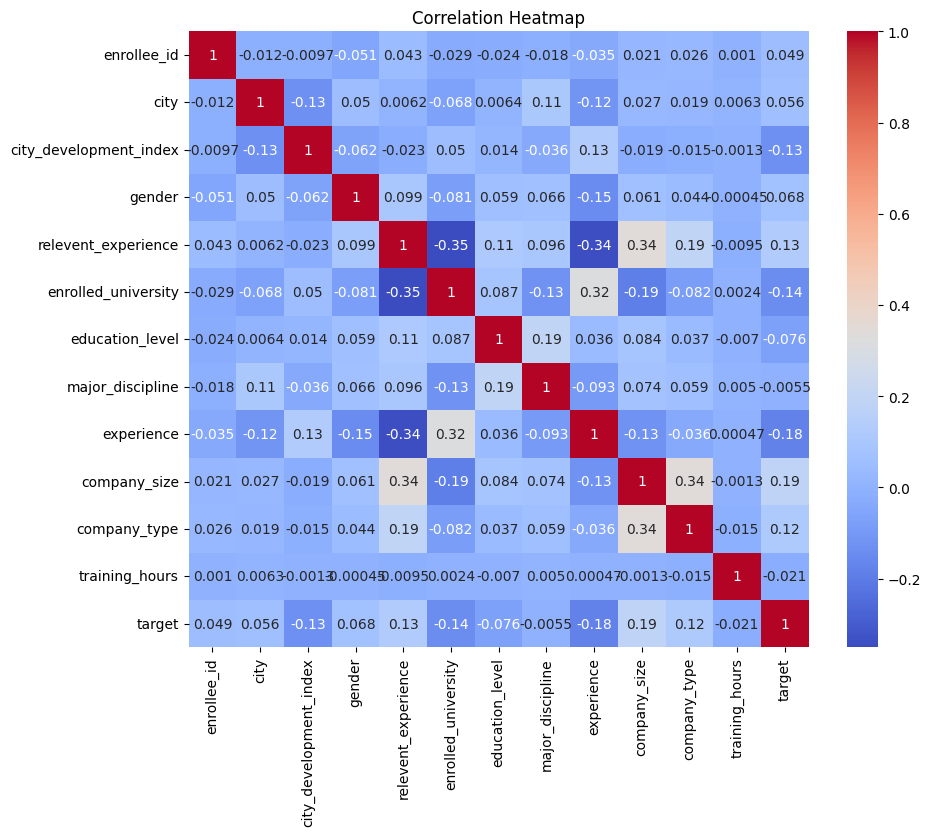

In [70]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Some analysis into the data

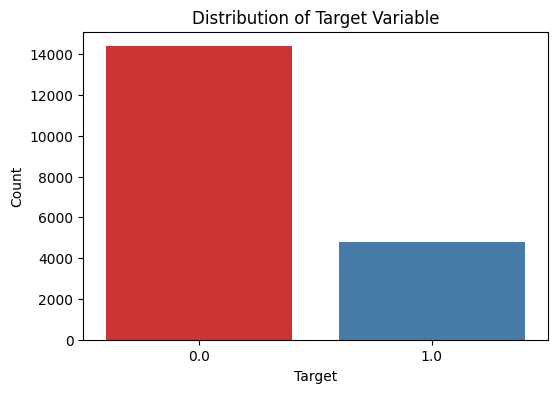

In [71]:
# Some analysis into the data
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

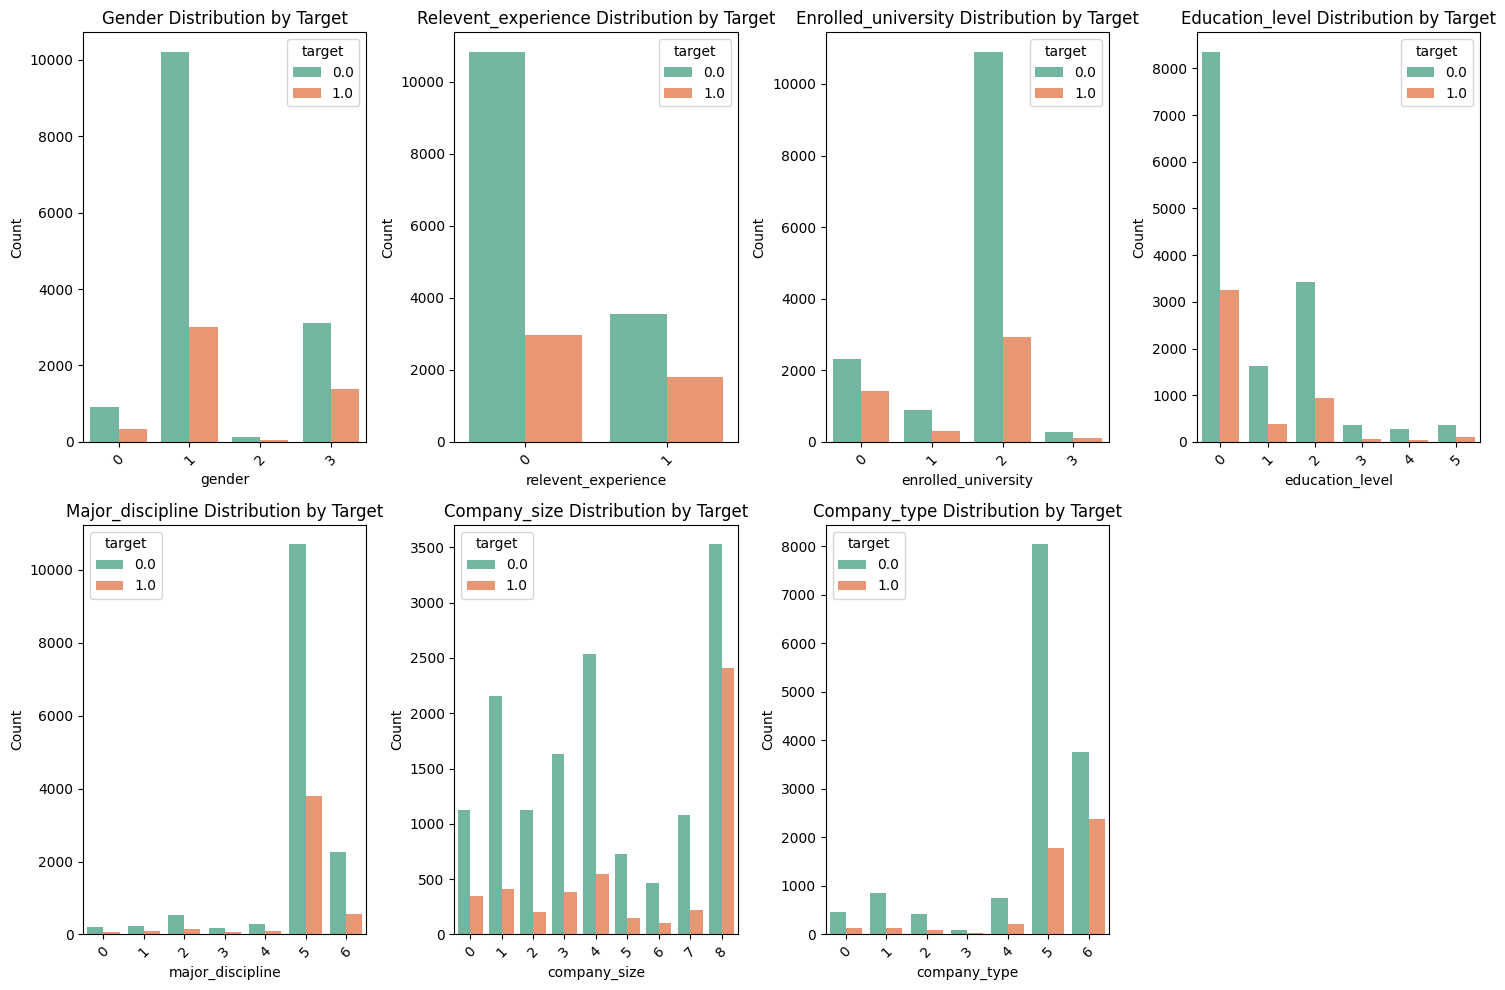

In [72]:
# Explore Categorical Features
categorical_features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
                        'company_size', 'company_type']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, data=df, hue='target', palette='Set2')
    plt.title(f'{feature.capitalize()} Distribution by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


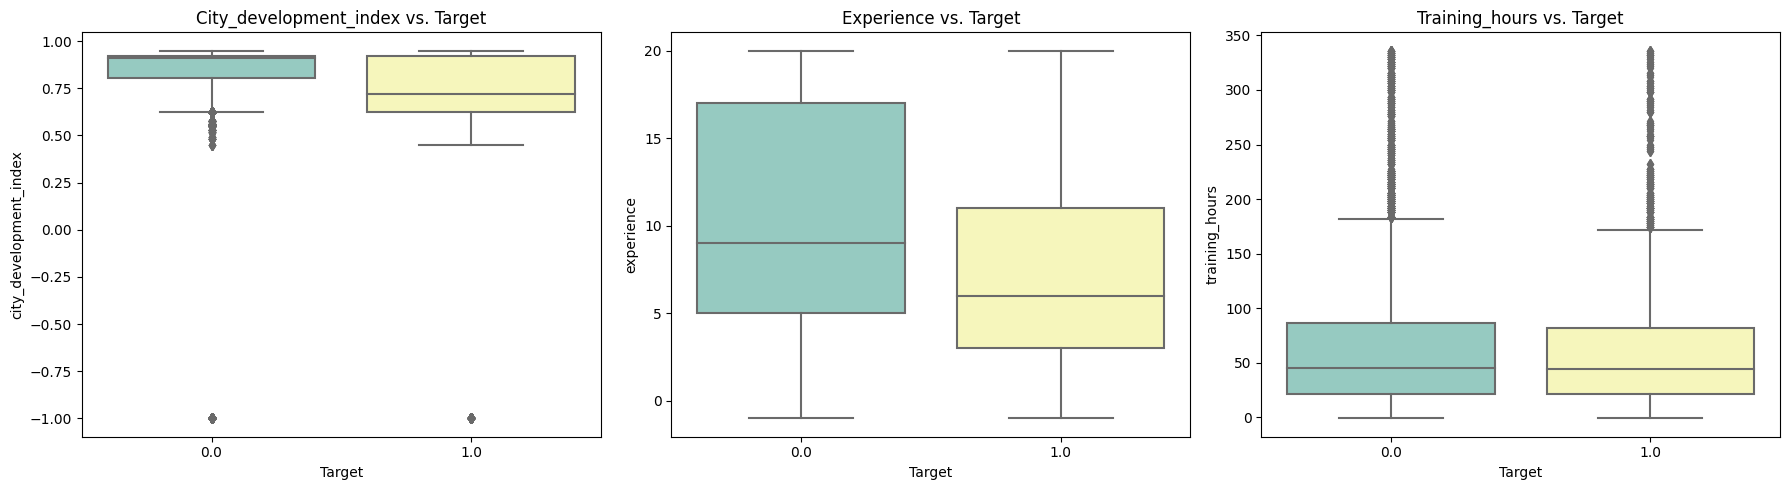

In [73]:
# Explore Numeric Features vs. Target
numeric_features = ['city_development_index', 'experience', 'training_hours']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='target', y=feature, data=df, palette='Set3')
    plt.title(f'{feature.capitalize()} vs. Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

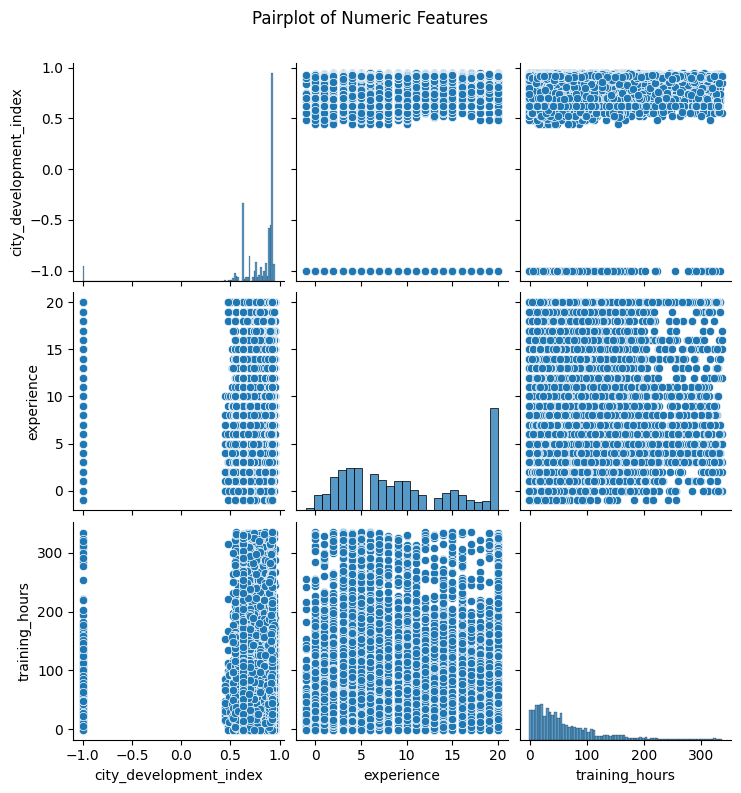

In [74]:
# Pairplot for Numeric Features
numeric_df = df[numeric_features]
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.05)
plt.show()


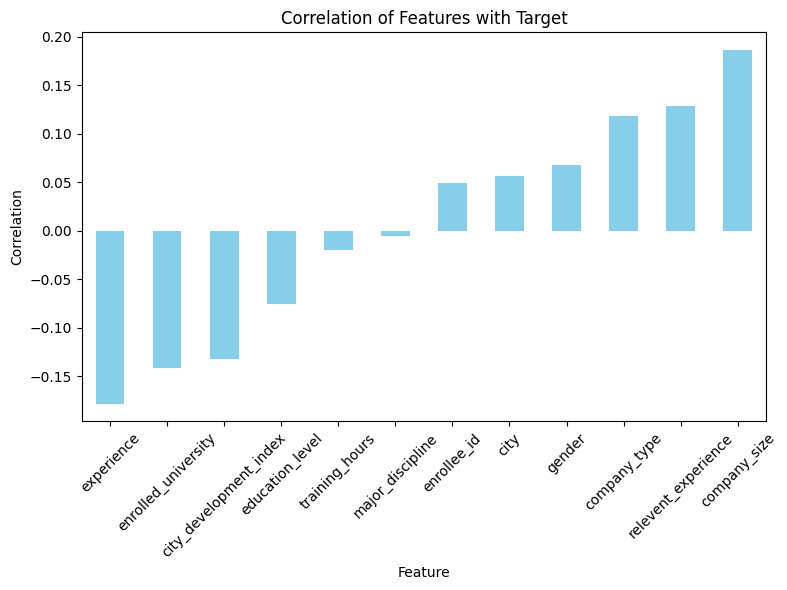

In [75]:
# Explore Correlations with Target
plt.figure(figsize=(8, 6))
target_corr = df.corr()['target'].drop('target')
target_corr.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Split the data and evaluate the performance

In [76]:
# Split Data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


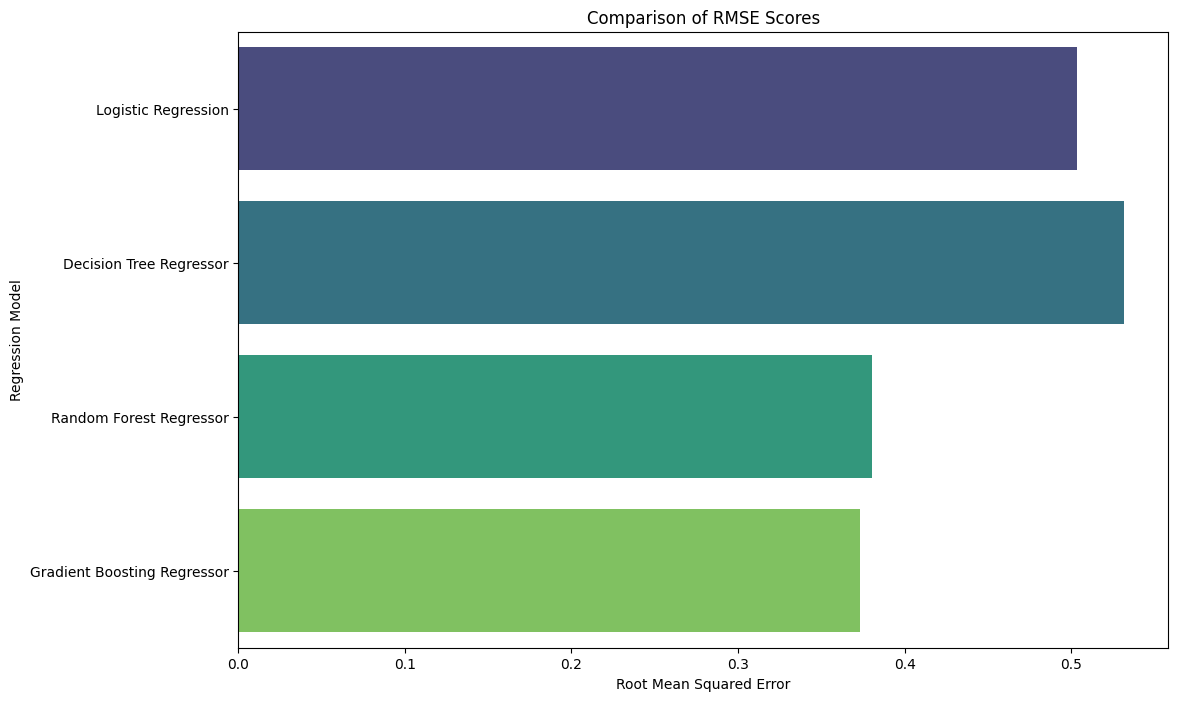

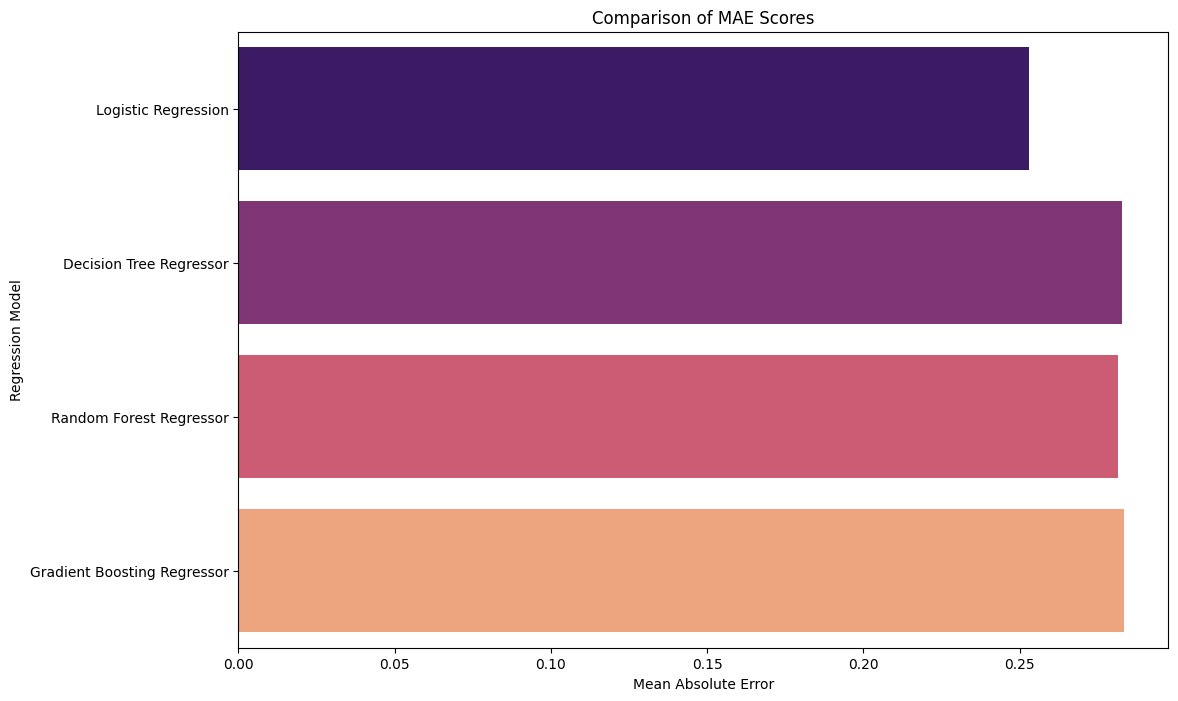

In [77]:
# Initialize Regression Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Initialize lists to store evaluation metrics
model_names = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Train and Evaluate Regression Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(model_name)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Create a bar plot for RMSE scores
plt.figure(figsize=(12, 8))
sns.barplot(x=rmse_scores, y=model_names, palette='viridis')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Regression Model')
plt.title('Comparison of RMSE Scores')
plt.show()

# Create a bar plot for MAE scores
plt.figure(figsize=(12, 8))
sns.barplot(x=mae_scores, y=model_names, palette='magma')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Regression Model')
plt.title('Comparison of MAE Scores')
plt.show()
